In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV , KFold , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
credit = pd.read_csv('creditcard.csv.zip')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit.isna().sum().sum()

0

In [6]:
mask = np.triu(np.ones_like(credit.corr() , dtype=bool))

<AxesSubplot:>

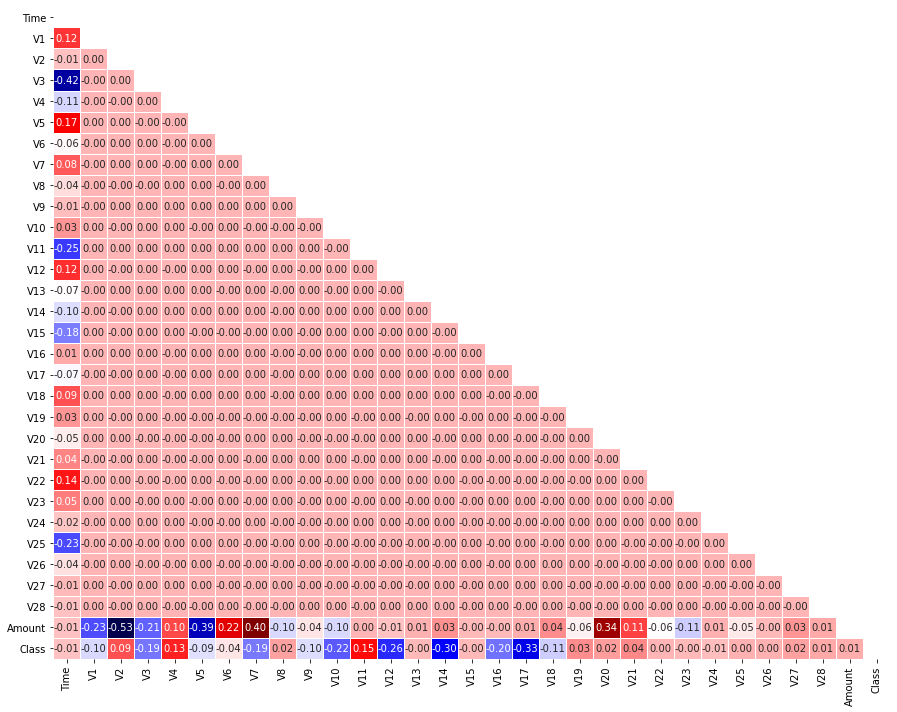

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(credit.corr() , annot=True , fmt='.2f' , cmap='seismic' , cbar=False , mask=mask , linewidths=1)

In [8]:
credit.corr()['Class'].sort_values()[:7]

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
Name: Class, dtype: float64

In [9]:
positive_col = credit.corr()['Class'].sort_values()[:7].keys()
positive_col

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7'], dtype='object')

In [10]:
plt.style.use('ggplot')

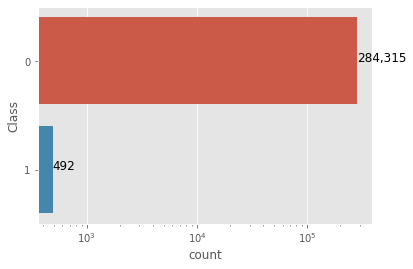

In [11]:
sns.countplot(data=credit , y='Class')

plt.annotate(f"{credit['Class'].value_counts()[0]:,.0f}" , xy=(credit['Class'].value_counts()[0], 0) , fontsize=12 )
plt.annotate(credit['Class'].value_counts()[1] , xy=(credit['Class'].value_counts()[1], 1) , fontsize=12 )
plt.xscale('log')

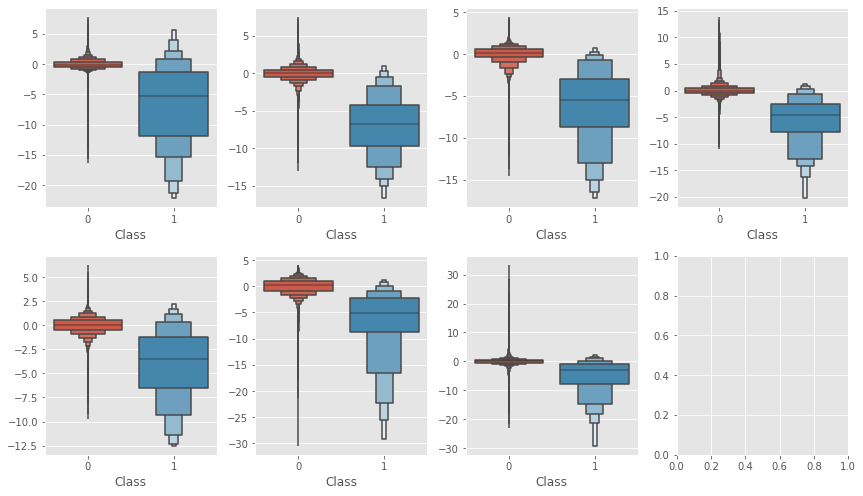

In [12]:
fig , ax = plt.subplots(2,4 , figsize=(12,7))
ax=ax.ravel()
for i , c in enumerate(credit[positive_col]) :
    sns.boxenplot(data=credit , x='Class' , y=c ,showfliers=False, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i]
plt.tight_layout()

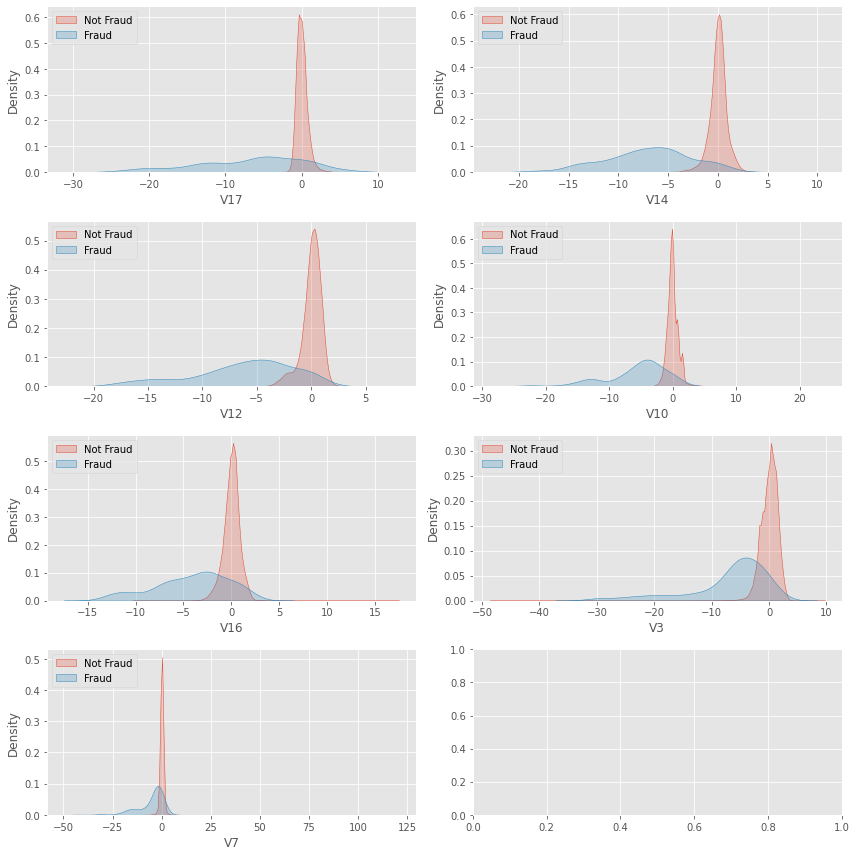

In [13]:
fig , ax = plt.subplots(4,2 , figsize=(12,12))
ax=ax.ravel()
for i , c in enumerate(credit[positive_col]) :
    sns.kdeplot(data=credit[credit['Class'] == 0 ] , x=c , shade=True , label='Not Fraud' , ax=ax[i])
    sns.kdeplot(data=credit[credit['Class'] == 1 ] , x=c , shade=True , label='Fraud' , ax=ax[i])
    ax[i].legend(loc='upper left')
plt.tight_layout()

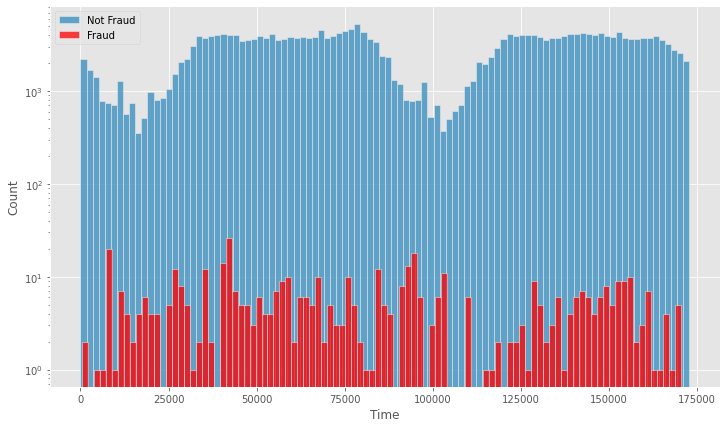

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(data=credit[credit['Class'] == 0] , x='Time' , label='Not Fraud' , bins=100)
sns.histplot(data=credit[credit['Class'] == 1] , x='Time', label='Fraud', color='red',bins=100)
plt.legend(loc='upper left')
plt.yscale('log')


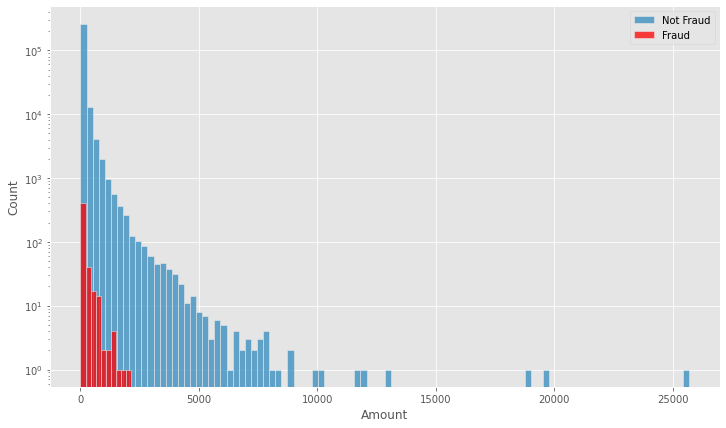

In [15]:
plt.figure(figsize=(12,7))
sns.histplot(data=credit[credit['Class'] == 0] , x='Amount' , label='Not Fraud' , bins=100)
sns.histplot(data=credit[credit['Class'] == 1] , x='Amount', label='Fraud', color='red',bins=10)
plt.legend(loc='upper right')
plt.yscale('log')


(0.0, 10000.0)

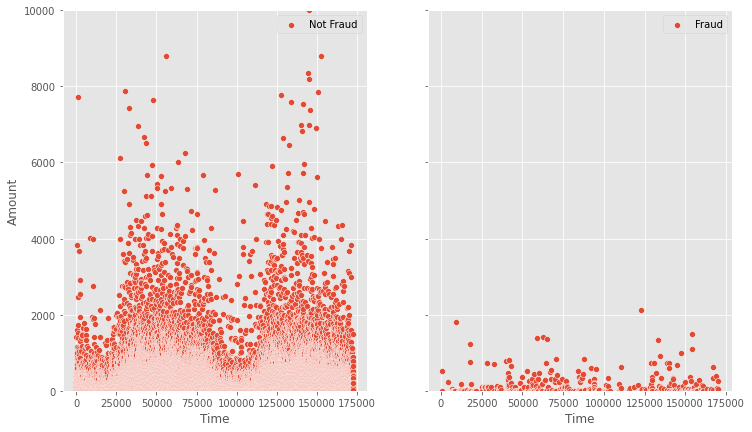

In [16]:
fig , ax=plt.subplots(1,2 , sharey=True , figsize=(12,7))
sns.scatterplot(data=credit[credit['Class'] == 0] , x='Time',y='Amount', label='Not Fraud' ,ax=ax[0])
sns.scatterplot(data=credit[credit['Class'] == 1] , x='Time',y='Amount', label='Fraud' ,ax=ax[1])
plt.legend()
plt.ylim(ymin=0 , ymax=10000)


# Prediction

In [17]:
credit[credit['Class']==1].shape[0]

492

In [18]:
credit = credit.sample(frac=1)

In [19]:
fraud = credit[credit['Class']==1][:492]
not_fraud = credit[credit['Class']==0][:492]

In [20]:
sample_set = pd.concat([fraud , not_fraud])

<AxesSubplot:xlabel='Class', ylabel='count'>

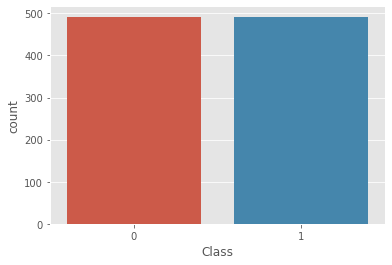

In [21]:
sns.countplot(data=sample_set , x='Class')

In [22]:
features_sample = sample_set.drop('Class' , axis=1)
target_sample = sample_set['Class']

In [23]:
x_train_sp , x_test_sp , y_train_sp , y_test_sp = train_test_split(features_sample , target_sample , test_size=0.2)

In [24]:
scaler = StandardScaler()

In [25]:
x_train_sp = scaler.fit_transform(x_train_sp)
x_test_sp = scaler.fit_transform(x_test_sp)

In [26]:
algor = dict(LogisticRegression = LogisticRegression() ,
            KNeighborsClassifier = KNeighborsClassifier() , 
            GaussianNB = GaussianNB() , 
            DecisionTreeClassifier = DecisionTreeClassifier())

In [27]:
for key , value in algor.items():
    score = cross_val_score(value , x_train_sp , y_train_sp , cv = 5)
    print(key)
    print(f'Score = {score}')
    print(f'Mean Score = {(score.mean()*100).round(2)} %\n')


LogisticRegression
Score = [0.94936709 0.94936709 0.91719745 0.91719745 0.93630573]
Mean Score = 93.39 %

KNeighborsClassifier
Score = [0.93037975 0.87341772 0.89171975 0.89808917 0.91082803]
Mean Score = 90.09 %

GaussianNB
Score = [0.94936709 0.90506329 0.93630573 0.87898089 0.9044586 ]
Mean Score = 91.48 %

DecisionTreeClassifier
Score = [0.92405063 0.90506329 0.87898089 0.86624204 0.88535032]
Mean Score = 89.19 %



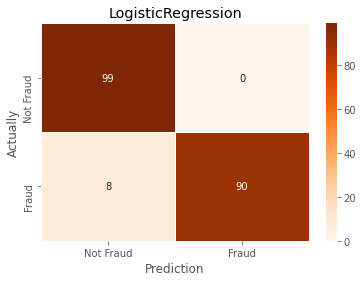

Accuracy Score = 95.94 %

              precision    recall  f1-score   support

   Not Fraud       0.93      1.00      0.96        99
       Fraud       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

----------------------------------------------------------------------------------------------------


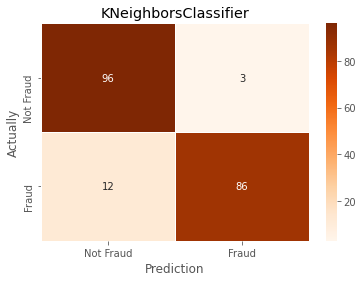

Accuracy Score = 92.39 %

              precision    recall  f1-score   support

   Not Fraud       0.89      0.97      0.93        99
       Fraud       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

----------------------------------------------------------------------------------------------------


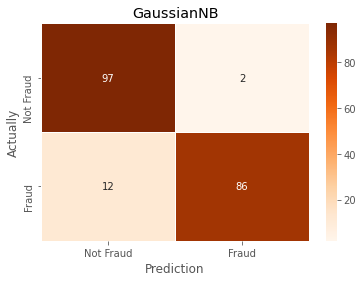

Accuracy Score = 92.89 %

              precision    recall  f1-score   support

   Not Fraud       0.89      0.98      0.93        99
       Fraud       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

----------------------------------------------------------------------------------------------------


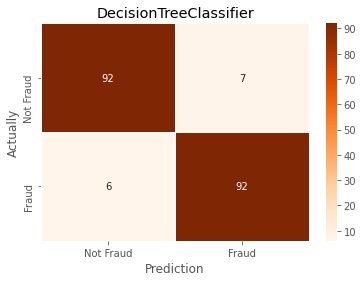

Accuracy Score = 93.4 %

              precision    recall  f1-score   support

   Not Fraud       0.94      0.93      0.93        99
       Fraud       0.93      0.94      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

----------------------------------------------------------------------------------------------------


In [28]:
i = 0
for key , value in algor.items():
    value.fit(x_train_sp , y_train_sp)
    y_pred_sp = value.predict(x_test_sp)
    
    label=['Not Fraud' , 'Fraud']
    conf_mat = pd.DataFrame(confusion_matrix(y_test_sp , y_pred_sp) ,index=label , columns=label )
    sns.heatmap(conf_mat , 
                annot=True , fmt='.0f' , cmap='Oranges' , linewidths=1)
    plt.xlabel('Prediction')
    plt.ylabel('Actually')
    plt.title(key)
    plt.show()
    
    print(f'Accuracy Score = {(accuracy_score(y_test_sp , y_pred_sp)*100).round(2)} %\n')
    print(classification_report(y_test_sp , y_pred_sp , target_names=['Not Fraud' , 'Fraud']))
    print('-'*100)
    i = i+1

## Logistic Regression

In [29]:
features = credit.drop('Class' , axis=1)
target = credit['Class']

In [30]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , shuffle=True , random_state=101)

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
print(f'Training Set = {x_train.shape}')
print(f'Testing Set = {x_test.shape}')

Training Set = (227845, 30)
Testing Set = (56962, 30)


In [33]:
param = dict(C=np.logspace(-5,5,11) , max_iter=[10000])

In [34]:
model = GridSearchCV(LogisticRegression() , param_grid=param , cv=5)
model.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'max_iter': [10000]})

In [35]:
print(f'Best Parameter = {model.best_params_}')

Best Parameter = {'C': 1.0, 'max_iter': 10000}


In [36]:
print(f'Best Score = {model.best_score_}')

Best Score = 0.9992319339902126


In [37]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:,1]

In [38]:
print(classification_report(y_test , y_pred , target_names=['Not Fraud' , 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56871
       Fraud       0.81      0.53      0.64        91

    accuracy                           1.00     56962
   macro avg       0.91      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



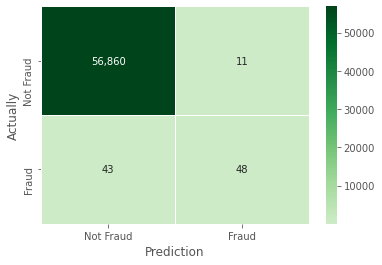

In [39]:
conf_mat = pd.DataFrame(confusion_matrix(y_test , y_pred) , index=['Not Fraud' , 'Fraud'] , columns=['Not Fraud' , 'Fraud'])
sns.heatmap(conf_mat , annot=True , fmt=',.0f' , linewidths=1 , cmap='Greens' , center=20000)
plt.xlabel('Prediction')
plt.ylabel('Actually');

In [40]:
tpr , fpr , th = roc_curve(y_test , y_pred_proba)

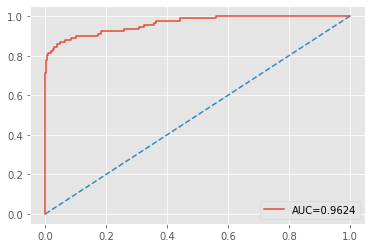

In [41]:
plt.plot(tpr , fpr , label=f'AUC={roc_auc_score(y_test , y_pred_proba).round(4)}')
plt.plot([0,1] , [0,1] , '--')
plt.legend(loc='lower right');